# b站-Node2Vec图嵌入

## 参考资料

Elior Cohen代码：https://github.com/eliorc/node2vec

Elior Cohen代码博客：https://maelfabien.github.io/machinelearning/graph_5/#graph-embedding

同济子豪兄：https://space.bilibili.com/1900783

2022-6-29

## 安装工具包

In [1]:
# !pip install node2vec networkx numpy matplotlib

## 导入工具包

In [2]:
import networkx as nx # 图数据挖掘
import numpy as np # 数据分析
import random # 随机数

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
import pandas as pd

## 导入数据集

In [3]:
# 空手道俱乐部数据集
# G = nx.karate_club_graph()

In [4]:
df = pd.read_csv("./data/bilibili_tag.csv", sep="\t")
print(df.isnull().sum())
df = df.dropna()
G = nx.from_pandas_edgelist(df,df.columns[0], df.columns[1], create_using=nx.Graph())

A    0
B    0
dtype: int64


In [5]:
G.nodes

NodeView(('嘻哈', '音乐分享官', 'GAI', '音乐', '音乐综合', '经典现场', 'VAVA', '中文说唱', '小青龙', '艾福杰尼', '黄旭', 'Jony J', '中国有嘻哈', '音乐分享官5.0', '极乐净土', '乐评盘点', '二次元', '动漫音乐', 'ACG音乐', 'One last kiss', '音乐分享官7.0', '美依礼芽', '群青', 'B站神曲', '萌娃', '运动', '音乐推荐', '歌曲', '动物', '听歌', '拍摄', '高能娱评官', '必剪创作', '娱乐', '娱乐杂谈', '生活', '萌', '可爱', '治愈系', '网红', '瑶一瑶', '热播综艺', '星动安利大作战·春日篇', '经典', '穿越时空的思念', '音乐分享官4.0', '幻昼', '伤感纯音乐', '告白之夜', '纯音乐', '轻音乐', '高音质', 'BGM', '雨的印记', '我的世界', '音游', '演奏', '单机游戏', '音乐游戏', 'MC', '别人的世界', '红石音乐', '耍把戏', '音乐教学', '视频', '视唱练耳', '听音', '艺考', '课堂', '系列', '钢琴', '流行音乐', '自学教程', '电钢琴入门', '音乐制作', '伴奏', '即兴伴奏', '学习资料', '钢琴教学', '学音乐', '钢琴曲', '暑期爆肝挑战', '钢琴演奏', 'Bi.Bi', '独奏', '夏日音乐祭', '音乐安利大赏', '翻唱', 'KPOP人集合企划', '欧美音乐', '英文歌曲', '英文', '洗脑', '音乐安利大赏2.0', 'The Backrooms', 'backrooms', '后室', 'Level!', 'Level ！', '音乐分享官6.0', '校园', '太好听了', '学生', '宅舞', '舞蹈', 'GARNiDELiA', 'Miume・MARiA・217', '217', 'MARiA', 'miume', 'みうめ', '一起看姐姐72面', '综艺', '乘风2023', '星动安利大作战·初夏篇', '龚琳娜', '小美', '极乐净土三人组金曲心动挑战', '同学', '尬舞', '4K', 

In [6]:
len(G)

559

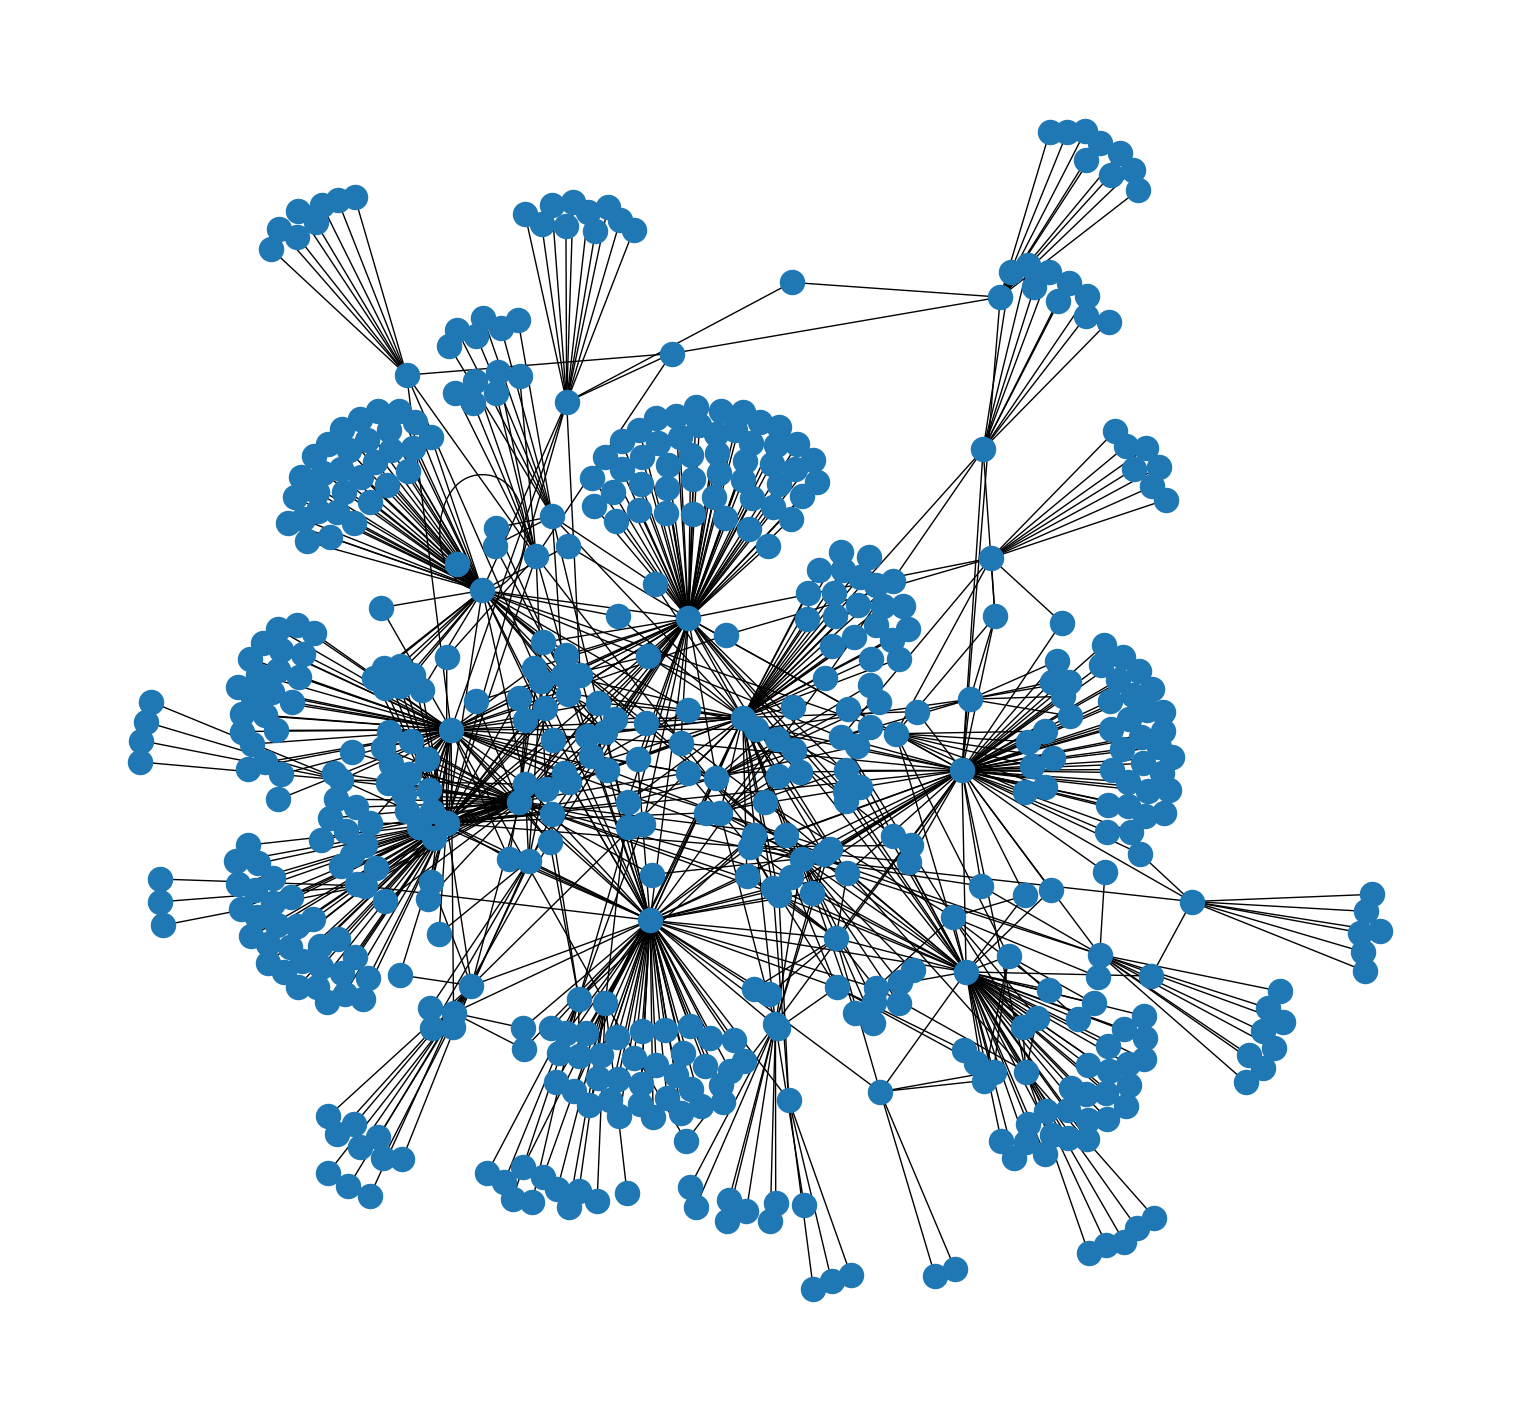

In [7]:
# 可视化
plt.figure(figsize=(15,14))
pos = nx.spring_layout(G, seed=5)
nx.draw(G, pos, with_labels=False)
plt.show()

## 构建Node2Vec模型

In [8]:
from node2vec import Node2Vec

In [9]:
# 设置node2vec参数
node2vec = Node2Vec(G, 
                    dimensions=32,  # 嵌入维度
                    p=1,            # 回家参数
                    q=0.5,          # 外出参数
                    walk_length=5, # 随机游走最大长度
                    num_walks=100,  # 每个节点作为起始节点生成的随机游走个数
                    workers=4       # 并行线程数
                   )

# p=1, q=0.5, n_clusters=6。DFS深度优先搜索，挖掘同质社群
# p=1, q=2, n_clusters=3。BFS宽度优先搜索，挖掘节点的结构功能。

# 训练Node2Vec，参数文档见 gensim.models.Word2Vec
model = node2vec.fit(window=1,    # Skip-Gram窗口大小
                     min_count=1,  # 忽略出现次数低于此阈值的节点（词）
                     batch_words=4 # 每个线程处理的数据量
                    )
X = model.wv.vectors

Computing transition probabilities:   0%|          | 0/559 [00:00<?, ?it/s]

In [10]:
X.shape

(559, 32)

## 节点Embedding聚类可视化

### 运行聚类

Kmeans聚类算法讲解：https://www.bilibili.com/video/BV1HJ411P7cs

In [11]:
# # DBSCAN聚类
# from sklearn.cluster import DBSCAN
# cluster_labels = DBSCAN(eps=0.5, min_samples=6).fit(X).labels_
# print(cluster_labels)

# KMeans聚类
from sklearn.cluster import KMeans
import numpy as np
cluster_labels = KMeans(n_clusters=3).fit(X).labels_
print(cluster_labels)

[1 1 2 0 0 1 2 1 1 2 0 2 2 2 2 0 1 1 0 2 2 1 1 1 2 2 1 1 1 1 1 1 2 2 2 1 1
 2 1 1 1 1 2 2 2 1 2 1 0 1 0 1 1 2 1 1 1 2 2 0 1 2 2 1 1 1 1 1 1 1 2 0 0 1
 1 2 2 0 0 2 2 2 2 1 2 0 1 1 2 2 0 1 0 1 1 2 2 0 0 0 0 1 1 0 1 0 2 0 2 1 0
 1 1 0 1 0 1 2 1 0 1 1 0 1 0 0 0 1 2 2 1 1 2 1 1 2 1 1 0 2 1 1 1 2 1 1 1 1
 2 2 1 2 2 1 2 1 1 0 1 1 1 1 2 1 1 1 1 2 2 1 2 2 2 0 2 2 1 2 2 1 0 0 2 0 2
 1 2 0 2 2 2 1 2 0 1 1 2 1 0 0 1 0 1 0 2 0 2 0 2 1 1 0 0 1 2 2 1 2 0 1 0 2
 1 2 2 1 2 0 2 0 0 2 1 2 2 2 2 0 2 1 0 1 1 1 1 0 1 0 1 0 1 0 2 1 1 0 0 1 1
 2 1 1 1 1 1 0 2 1 0 2 2 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 2 1 2 1 2 2 0 2
 2 0 2 0 0 2 1 1 0 1 0 1 0 0 1 2 0 1 2 1 2 2 0 0 1 1 1 0 1 1 1 2 2 0 1 1 0
 0 2 1 1 0 2 0 0 1 1 1 0 0 1 2 2 0 2 2 2 1 0 1 1 0 0 2 0 1 2 1 0 1 2 2 1 0
 0 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 2 1 2 2 0 1 2 1 1 2 1 1 0 2 2 1 0 1 2
 1 0 1 2 0 2 2 0 1 2 1 1 0 1 1 2 1 1 1 2 1 1 2 2 1 1 1 2 1 1 1 1 0 2 1 1 1
 2 0 2 1 2 2 2 2 0 2 0 1 1 1 2 1 1 2 2 1 1 1 2 0 2 2 2 0 1 1 1 1 1 1 1 2 0
 1 1 2 1 0 2 0 1 0 2 2 1 

### 将networkx中的节点和词向量中的节点对应

将词汇表的节点顺序转为networkx中的节点顺序

In [12]:
colors = []
nodes = list(G.nodes)
for node in nodes: # 按 networkx 的顺序遍历每个节点
    idx = model.wv.key_to_index[str(node)] # 获取这个节点在 embedding 中的索引号
    colors.append(cluster_labels[idx]) # 获取这个节点的聚类结果

### 可视化聚类效果

D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


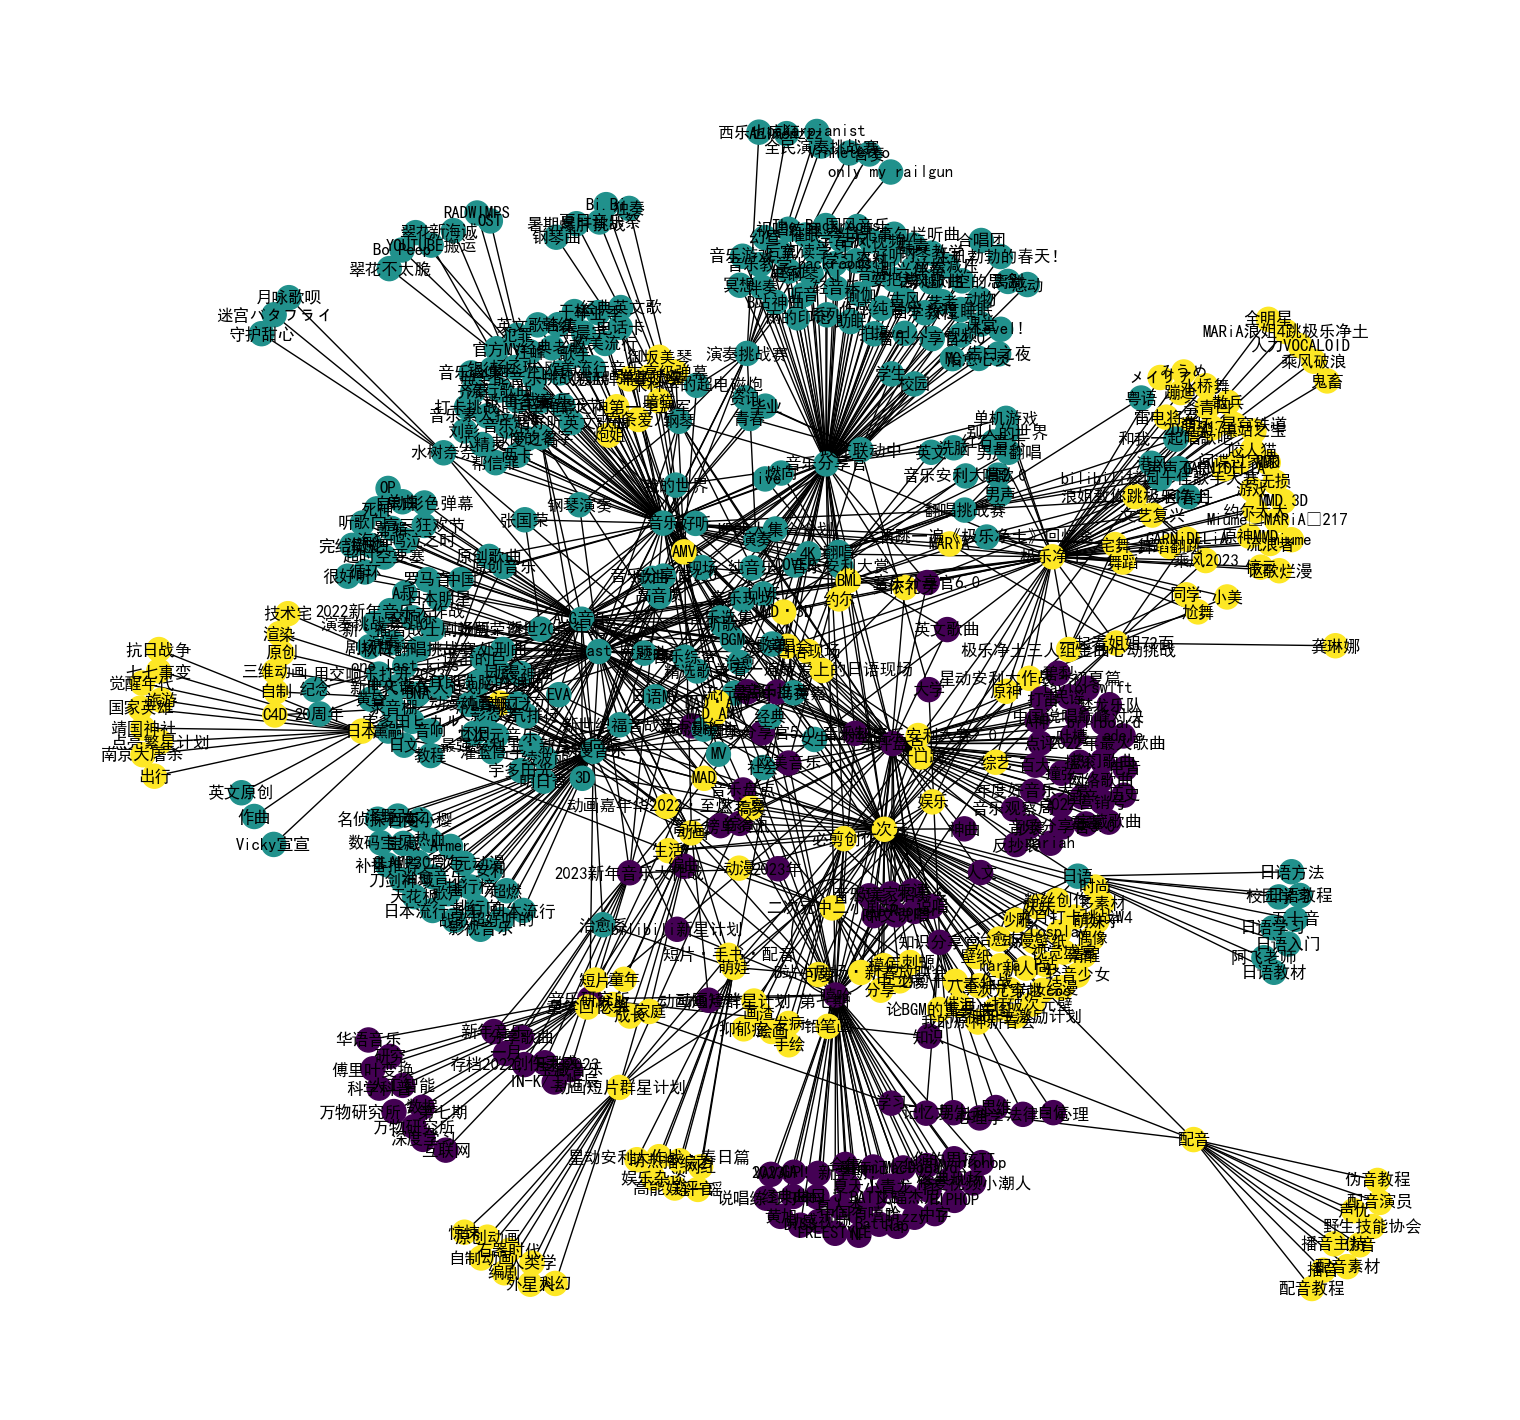

In [13]:
plt.figure(figsize=(15,14))
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.show()

## 查看Embedding

In [14]:
model.wv.get_vector('嘻哈').shape

(32,)

In [15]:
# 查看某个节点的Embedding
model.wv.get_vector('嘻哈')

array([ 2.5355253e-01,  6.8005860e-01,  1.2247360e+00, -5.8431786e-01,
        8.1339240e-01, -6.8119252e-01,  6.7778885e-01,  4.7984493e-01,
        5.9159547e-01,  1.2531136e+00,  1.3251570e+00,  3.4251195e-01,
        4.2370680e-01, -8.2515937e-01, -1.5508597e-01,  4.0689647e-01,
       -3.3908570e-01,  7.0071000e-01,  6.8590897e-01,  3.2112059e-01,
        7.2661608e-01,  6.8182421e-01,  9.5348847e-01, -7.6342154e-01,
        6.3312864e-01,  2.7780622e-01, -1.0815672e-01,  1.2212362e+00,
        5.8085525e-01,  9.3788968e-04,  1.2998861e-01,  7.7449650e-01],
      dtype=float32)

In [16]:
# 查找 嘻哈 节点的相似节点
model.wv.most_similar('嘻哈')
# 也可以用下面函数
# model.wv.similar_by_word('嘻哈')

[('你的男孩TT', 0.8375685214996338),
 ('中国有嘻哈', 0.8265380263328552),
 ('夏天', 0.8246513605117798),
 ('Jony J', 0.8239367008209229),
 ('2023UP！新学期！', 0.819570004940033),
 ('DISS', 0.8194901943206787),
 ('Tom MacDonald', 0.8148323893547058),
 ('童年记忆', 0.8146306872367859),
 ('BATTLE', 0.8090991377830505),
 ('修复视频小潮人', 0.8089244961738586)]

In [17]:
# 查看任意两个节点的相似度
model.wv.similarity('嘻哈', '说唱')

0.6869271

In [18]:
# 查看任意两个节点的相似度
model.wv.similarity('嘻哈', '日语')

0.25739077

## 对Edge（连接）做Embedding

In [19]:
from node2vec.edges import HadamardEmbedder

In [20]:
# Hadamard 二元操作符：两个 Embedding 对应元素相乘
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [21]:
# 查看 任意两个节点连接 的 Embedding
edges_embs[('嘻哈', '英文歌曲')]

array([-1.12442493e-01, -5.86079001e-01, -5.91575131e-02, -6.28689408e-01,
        2.19527185e-01, -3.46658856e-01,  2.93107688e-01,  3.65518004e-01,
       -1.17894754e-01,  3.50259990e-01,  3.26268613e-01,  3.18089902e-01,
       -2.09208608e-01,  4.04740602e-01,  1.34762794e-01,  2.10058033e-01,
        1.90604880e-01,  5.56499004e-01,  3.43857259e-01,  2.50476480e-01,
        2.01488674e-01,  3.83462280e-01,  1.26522279e+00,  8.52860272e-01,
        5.48738658e-01, -6.71781898e-02,  4.27735411e-03, -7.38668561e-01,
        1.23970985e-01, -2.23137278e-04,  4.44426797e-02,  7.64036253e-02],
      dtype=float32)

In [22]:
# 计算所有 Edge 的 Embedding
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|███████████████████████████████████████████| 156520/156520.0 [00:01<00:00, 80458.60it/s]


In [23]:
edges_kv.index_to_key

["('音乐分享官', '音乐分享官')",
 "('音乐', '音乐分享官')",
 "('二次元', '音乐分享官')",
 "('乐评盘点', '音乐分享官')",
 "('嘻哈', '音乐分享官')",
 "('动漫音乐', '音乐分享官')",
 "('极乐净土', '音乐分享官')",
 "('One last kiss', '音乐分享官')",
 "('ACG音乐', '音乐分享官')",
 "('动画', '音乐分享官')",
 "('音乐分享官', '音乐研究所')",
 "('日本', '音乐分享官')",
 "('配音', '音乐分享官')",
 "('AMV', '音乐分享官')",
 "('动画短片群星计划', '音乐分享官')",
 "('2023新年音乐大作战', '音乐分享官')",
 "('演奏挑战赛', '音乐分享官')",
 "('日语', '音乐分享官')",
 "('知识分享官', '音乐分享官')",
 "('必剪创作', '音乐分享官')",
 "('萌娃', '音乐分享官')",
 "('钢琴', '音乐分享官')",
 "('翻唱挑战赛', '音乐分享官')",
 "('政在联动中', '音乐分享官')",
 "('动画加工厂', '音乐分享官')",
 "('浪姐教你跳极乐净土', '音乐分享官')",
 "('音乐分享官', '音乐综合')",
 "('翻唱', '音乐分享官')",
 "('音乐分享官', '音乐安利大赏')",
 "('你的名字', '音乐分享官')",
 "('新世纪福音战士', '音乐分享官')",
 "('新世代音乐人计划女生季', '音乐分享官')",
 "('看一遍就爱上的日语现场', '音乐分享官')",
 "('BML', '音乐分享官')",
 "('二次元中二小剧场', '音乐分享官')",
 "('音乐分享官', '音乐现场')",
 "('中岛美嘉', '音乐分享官')",
 "('一起看姐姐72面', '音乐分享官')",
 "('再跳一遍《极乐净土》回忆杀', '音乐分享官')",
 "('LIVE', '音乐分享官')",
 "('水树奈奈', '音乐分享官')",
 "('干杯音乐节', '音乐分享官')",
 "('美依礼芽', '音乐分享官')",
 "('娱

In [24]:
# 查看 关系与 某两个节点 最相似的 节点对
edges_kv.most_similar(str(('嘻哈', '英文歌曲')))

[("('嘻哈', '洗脑')", 0.8928031325340271),
 ("('嘻哈', '音乐安利大赏2.0')", 0.8895899653434753),
 ("('嘻哈', '英文')", 0.8874242305755615),
 ("('billboard', '嘻哈')", 0.8267215490341187),
 ("('嘻哈', '抄袭')", 0.8218768835067749),
 ("('你的男孩TT', '英文歌曲')", 0.8202031850814819),
 ("('taylorswift', '嘻哈')", 0.8168467283248901),
 ("('夏天', '英文歌曲')", 0.8085158467292786),
 ("('中国有嘻哈', '英文歌曲')", 0.8055193424224854),
 ("('mariah', '嘻哈')", 0.8052485585212708)]

## PCA降维可视化

### 可视化全部词条的二维Embedding¶

In [25]:
X = model.wv.vectors

In [26]:
# 将Embedding用PCA降维到2维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embed_2d = pca.fit_transform(X)

In [27]:
embed_2d.shape

(559, 2)

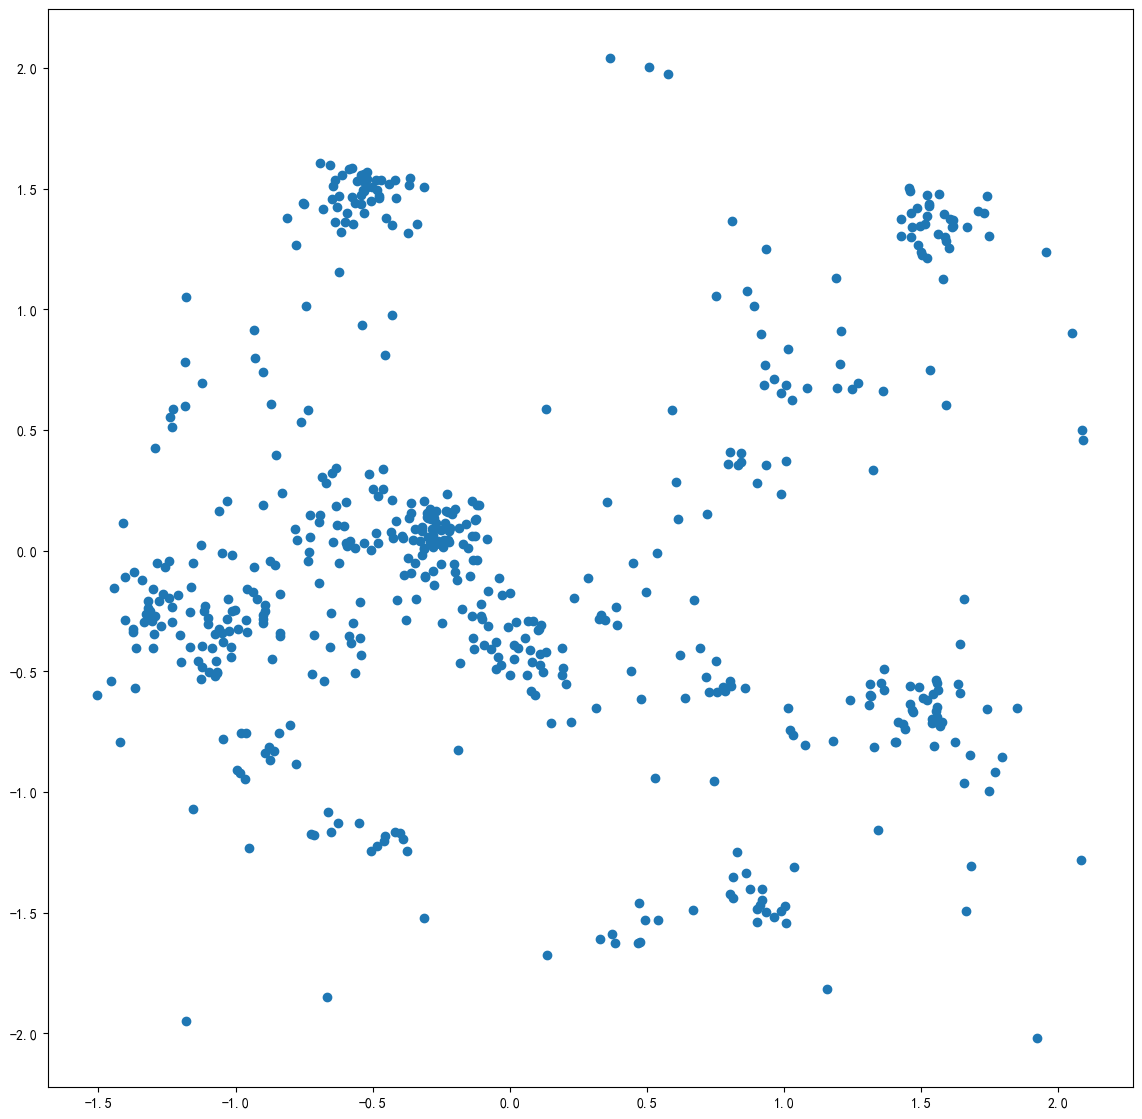

In [28]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

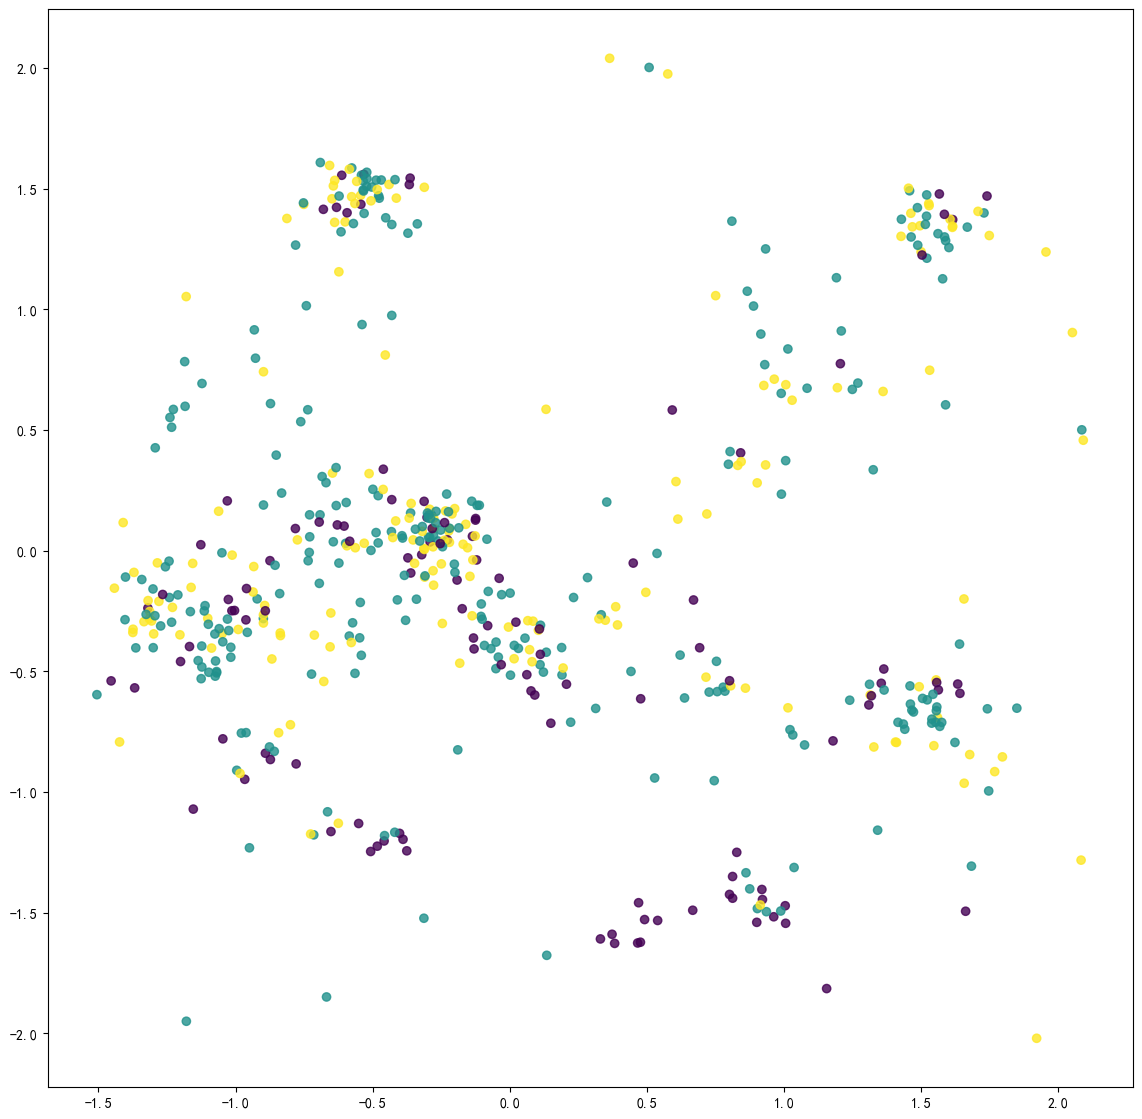

In [29]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1], c=colors, alpha=0.8)
plt.show()

## TSNE降维可视化

### 可视化全部词条的二维Embedding¶

In [30]:
# 将Embedding用TSNE降维到2维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
embed_2d = tsne.fit_transform(X)

D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


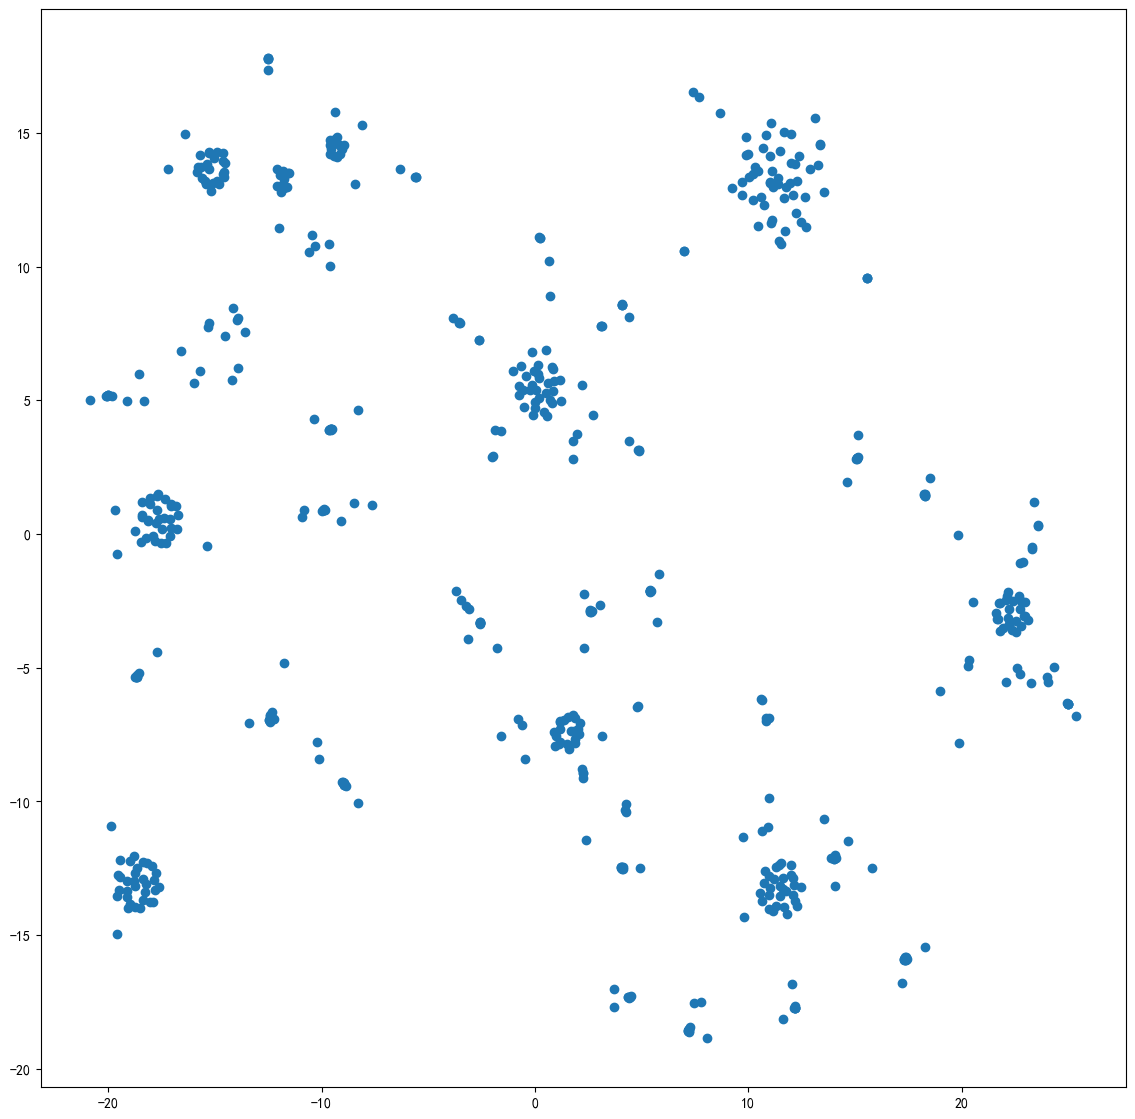

In [31]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

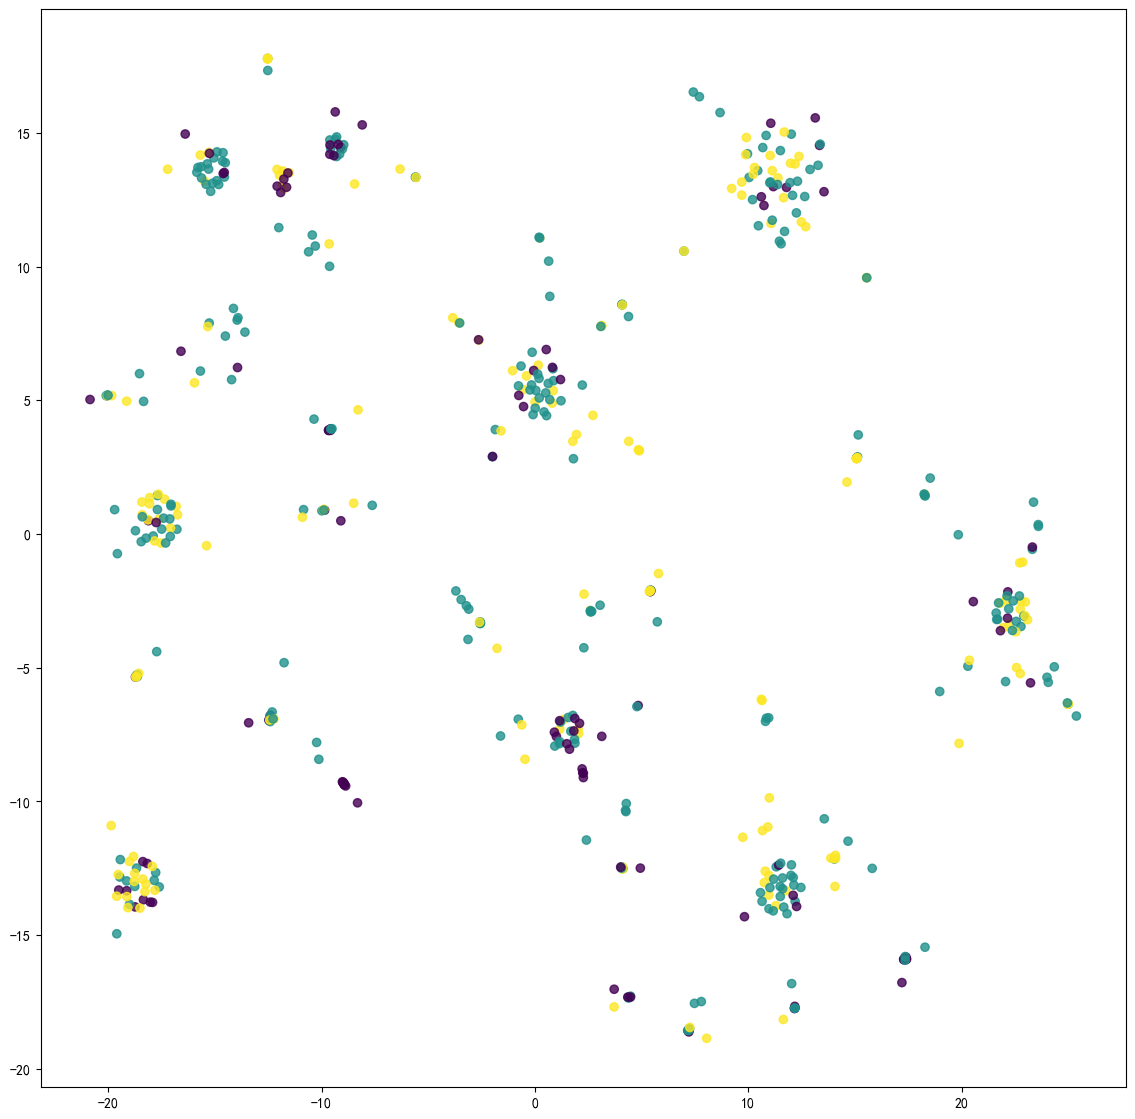

In [32]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1], c=colors, alpha=0.8)
plt.show()

#可以看到TSNE降维可视化的效果更好一些

### 可视化某个词条的二维Embedding

In [33]:
term = '音乐'

In [34]:
term_256d = model.wv[term].reshape(1,-1)

In [35]:
term_256d.shape

(1, 32)

In [36]:
term_2d = pca.transform(term_256d)

In [37]:
term_2d

array([[-0.47993112,  0.22852775]], dtype=float32)

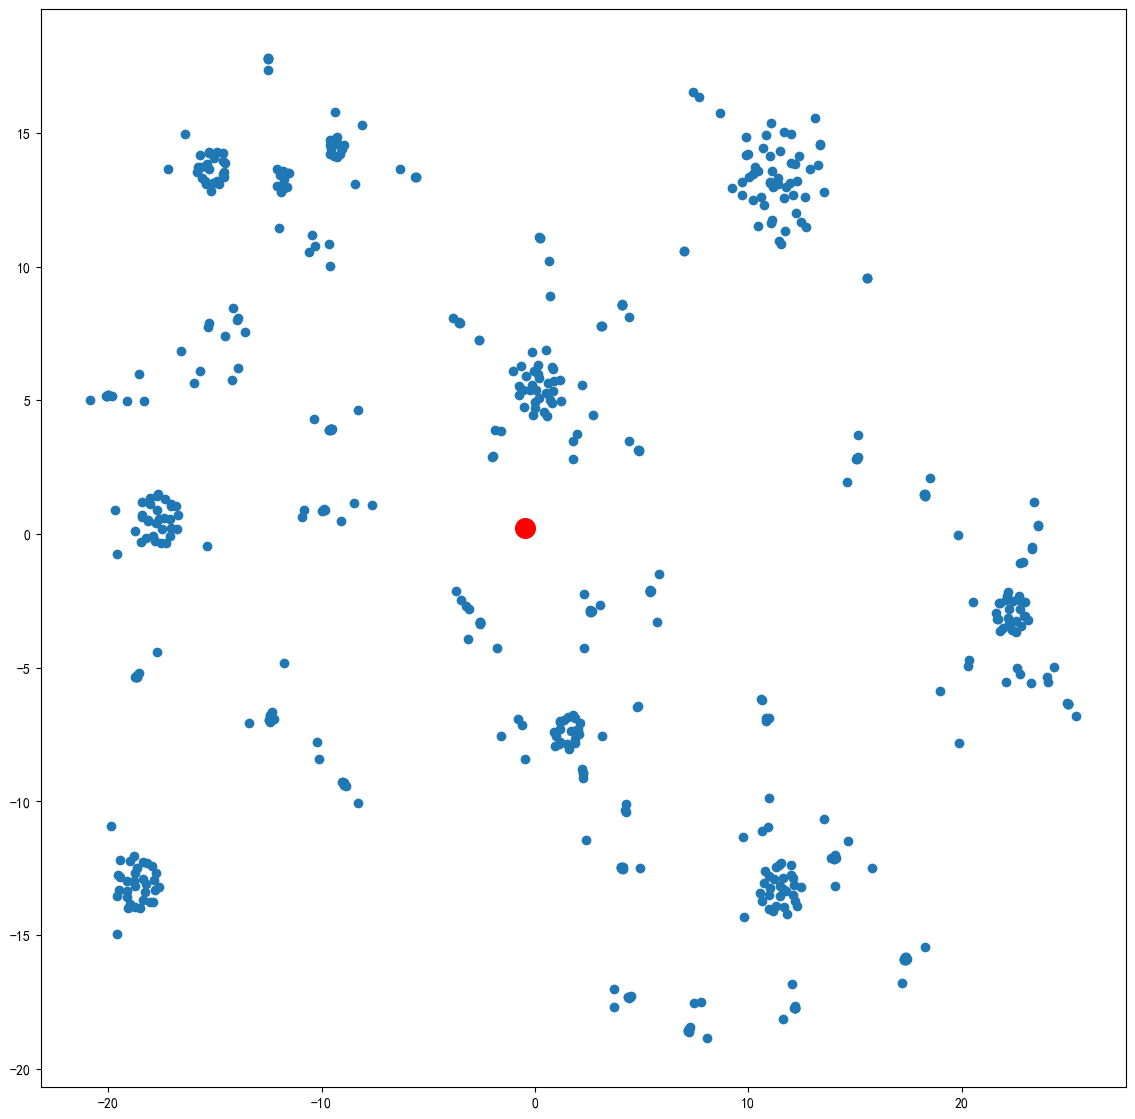

In [38]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])
plt.scatter(term_2d[:,0],term_2d[:,1],c='r',s=200)
plt.show()

### 可视化某些词条的二维Embedding

In [39]:
# 计算PageRank重要度
pagerank = nx.pagerank(G)
# 从高到低排序
node_importance = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)

In [40]:
# 取最高的前n个节点
n = 50
terms_chosen = []
for each in node_importance[:n]:
    terms_chosen.append(each[0])

In [41]:
# 手动补充新节点
# terms_chosen.extend(['computer vision','deep learning','convolutional neural network','convolution','natural-language processing','attention (machine learning)','support-vector machine','decision tree','random forest','computational imaging','machine vision','cognitive science','neuroscience','psychophysics','brain','visual cortex','visual neuroscience','cognitive model','finite difference','finite difference time domain','finite difference coefficients','finite difference methods for option pricing','iso 128','iso 10303'])


In [42]:
terms_chosen

['音乐分享官',
 '音乐',
 '二次元',
 '乐评盘点',
 '动漫音乐',
 '嘻哈',
 'One last kiss',
 '极乐净土',
 'ACG音乐',
 '音乐研究所',
 '动画',
 '配音',
 'AMV',
 '日本',
 '动画短片群星计划',
 '2023新年音乐大作战',
 '知识分享官',
 '萌娃',
 '日语',
 '演奏挑战赛',
 '必剪创作',
 '政在联动中',
 '钢琴',
 '翻唱挑战赛',
 '动画加工厂',
 '浪姐教你跳极乐净土',
 '新世纪福音战士',
 '音乐综合',
 '翻唱',
 'BML',
 '看一遍就爱上的日语现场',
 '二次元中二小剧场',
 '音乐安利大赏',
 '你的名字',
 '新世代音乐人计划女生季',
 '一起看姐姐72面',
 '音乐现场',
 '中岛美嘉',
 'LIVE',
 '再跳一遍《极乐净土》回忆杀',
 '水树奈奈',
 '干杯音乐节',
 '美依礼芽',
 '张国荣逝世20周年纪念',
 '极乐净土三人组金曲心动挑战',
 '娱乐',
 '生活',
 '流行音乐',
 '演奏',
 '音乐分享官5.0']

### 可视化全部词条和关键词条的二维Embedding

In [43]:
# 输入词条，输出词典中的索引号
term2index = model.wv.key_to_index

In [44]:
# index2term = model.wv.index_to_key
# term_index = np.array(term2index.values())

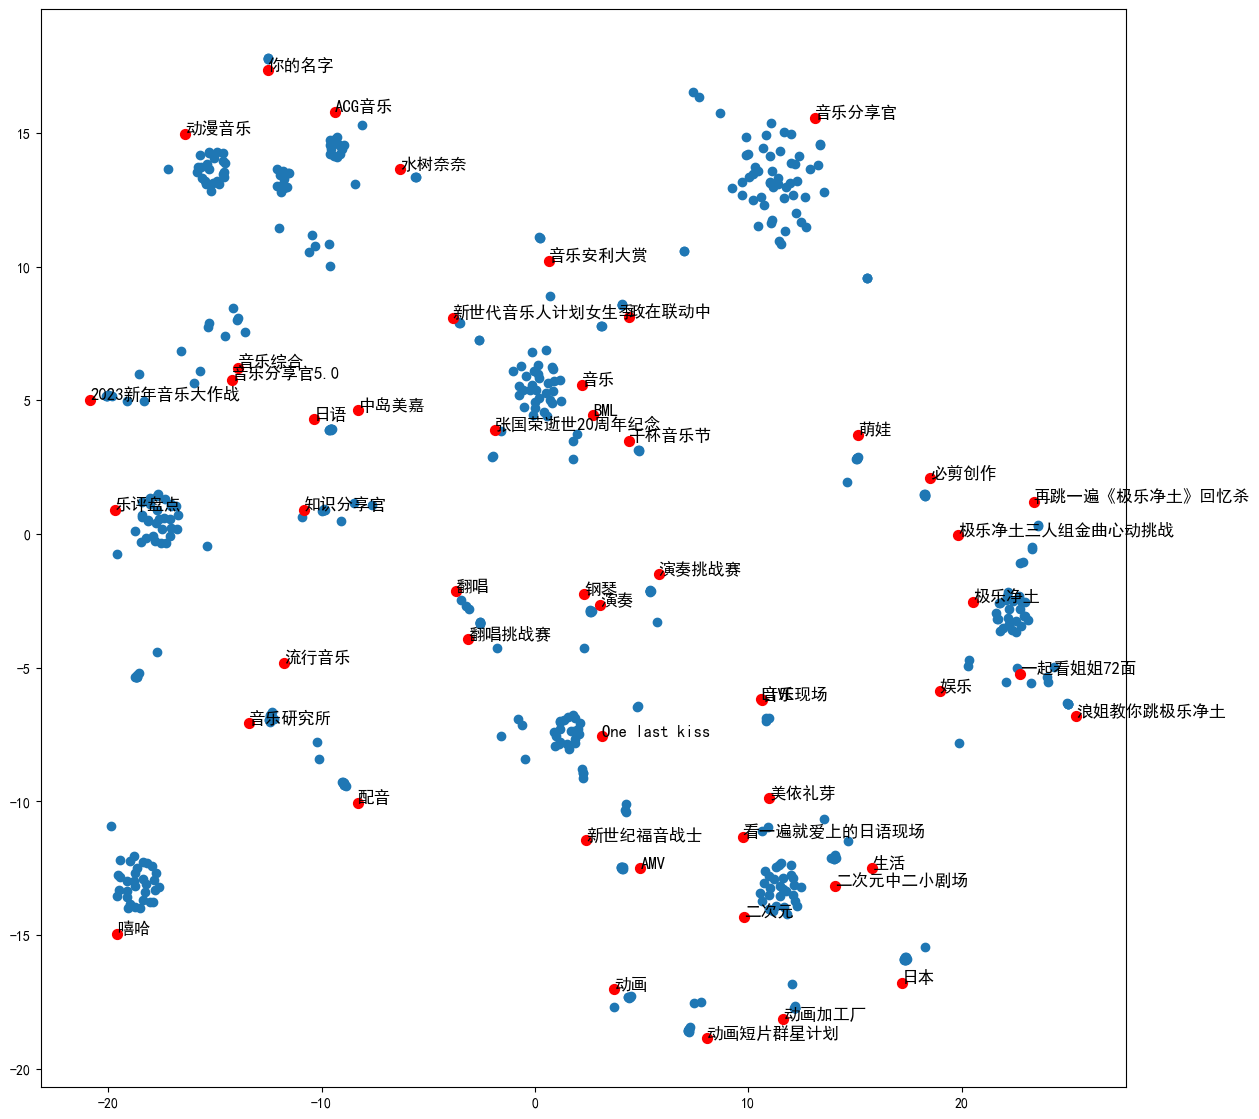

In [45]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])

for item in terms_chosen:
    idx = term2index[item]
    plt.scatter(embed_2d[idx,0], embed_2d[idx,1],c='r',s=50)
    plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='k',fontsize=12)
plt.show()

In [46]:
embed_2d.shape

(559, 2)

### 导出TSNE降维到二维之后的Embedding

In [47]:
terms_chosen_mask = np.zeros(X.shape[0])
for item in terms_chosen:
    idx = term2index[item]
    terms_chosen_mask[idx] = 1

In [48]:
df = pd.DataFrame()
df['X'] = embed_2d[:,0]
df['Y'] = embed_2d[:,1]
df['item'] = model.wv.index_to_key
df['pagerank'] = pagerank.values()
df['chosen'] = terms_chosen_mask

In [49]:
df

,X,Y,item,pagerank,chosen
0,13.140464,15.569435,音乐分享官,0.032587,1.0
1,2.217901,5.575752,音乐,0.048502,1.0
2,9.822087,-14.310218,二次元,0.000755,1.0
3,-19.710890,0.915686,乐评盘点,0.041230,1.0
4,-19.609564,-14.949460,嘻哈,0.005284,1.0
...,...,...,...,...,...
554,-9.225771,14.579201,循环,0.000755,0.0
555,-14.619807,13.486792,安利,0.000755,0.0
556,1.492658,-7.841124,教程,0.000755,0.0
557,-15.266294,14.242119,CLAMP30周年,0.000755,0.0


In [50]:
df.to_csv('./res/tsne_vis_2d.csv',index=False)